In [6]:
import sys

sys.path.append("../src")

In [58]:
# from exp_smoothing import ExpSmoothing
import exponential_smoothing
from importlib import reload
reload(exponential_smoothing)

obj = exponential_smoothing.ExpSmoothing()

In [77]:
repo = "p971074907"
country = "brl"
subregion1 = "rn"
path = country+':'+subregion1
feature = "date:newDeaths"
mavg_window_size = "7"
begin = "2020-01-01"
end = "2050-01-01"

data = obj.get_data(repo, path, feature, mavg_window_size, begin, end)

In [78]:
data_test_size_in_days = 7*10
input_window_size = 7
scores = obj.grid_search_exp(data_test_size_in_days, input_window_size)

> Model[[None, False, None, None, False, False]] 1.648
done model exp
3 best models are: 
[None, False, None, None, False, False] 1.648481941475326



In [79]:
obj.retrain_best_models()

In [80]:
obj.instance_save()

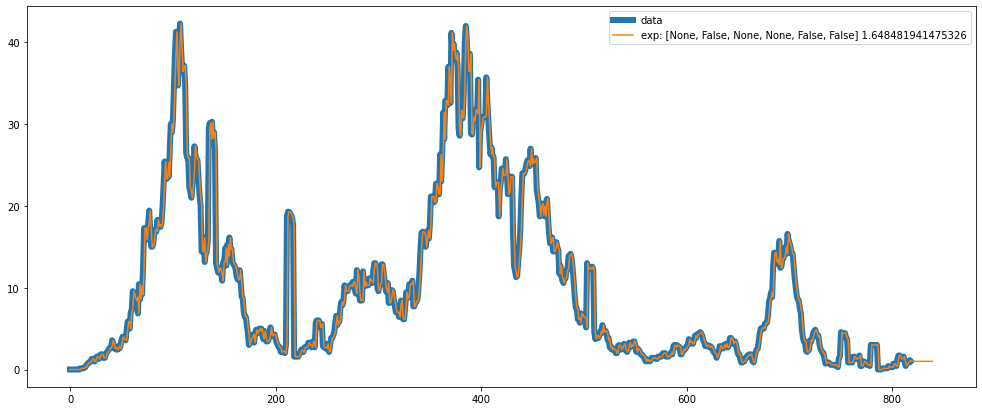

In [81]:
yhat = obj.instance_forecast_ahead(20)

import matplotlib.pyplot as plt
name = obj.model_instances[0][0]
cfg = obj.model_instances[0][3]
error = obj.model_instances[0][4]

plt.figure(figsize=(17,7))
plt.plot(obj.data_used_in_trainning, label='data', linewidth=6)
plt.plot(yhat, label=name+": "+cfg+" "+str(error))
plt.legend()

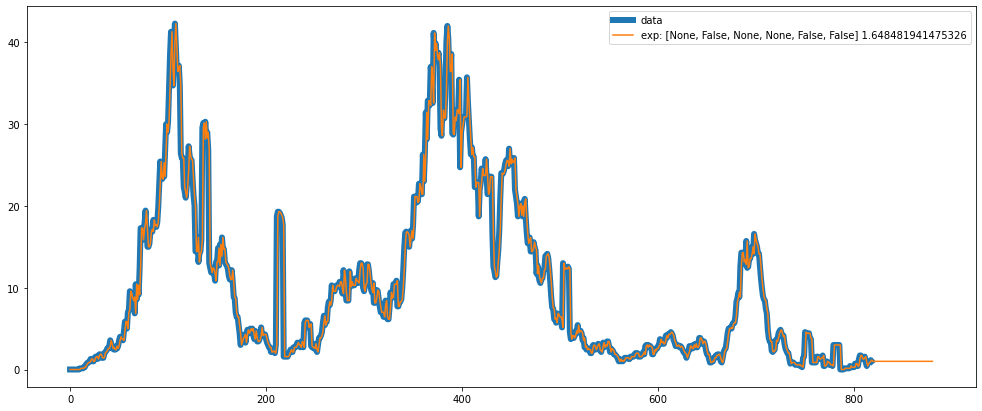

In [82]:
begin_forecast = "2020-04-01"
end_forecast = "2022-08-10"
yhat = obj.instance_forecast_by_period(str(obj.begin_raw.date()), end_forecast)

import matplotlib.pyplot as plt
name = obj.model_instances[0][0]
cfg = obj.model_instances[0][3]
error = obj.model_instances[0][4]

plt.figure(figsize=(17,7))
plt.plot(obj.data_used_in_trainning, label='data', linewidth=6)
plt.plot(yhat, label=name+": "+cfg+" "+str(error))
plt.legend()

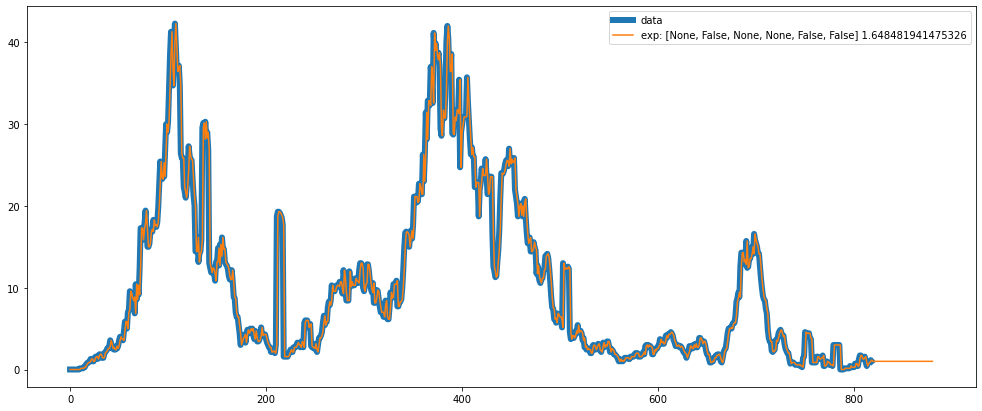

In [88]:
import uuid, json

# save_metadata_path = "../dbs/instances_metadata/"
filename = "metadata_[None, False, None, None, False, False]_brl:rn.json"
# metadata = json.load(open(save_metadata_path+filename))

instance_object = obj.load_instance_from_local_metadata_filename(filename)

begin_forecast = "2020-04-01"
end_forecast = "2022-08-10"
yhat = obj.instance_forecast_by_period(str(obj.begin_raw.date()), end_forecast, instance_object)

import matplotlib.pyplot as plt
name = obj.model_instances[0][0]
cfg = obj.model_instances[0][3]
error = obj.model_instances[0][4]

plt.figure(figsize=(17,7))
plt.plot(obj.data_used_in_trainning, label='data', linewidth=6)
plt.plot(yhat, label=name+": "+cfg+" "+str(error))
plt.legend()

# instance_forecast_by_period_from_object(metadata)

In [84]:
model_inst = obj.model_instances[0][2]
print(obj.model_instances)

[('exp', <function exp_smoothing_forecast at 0x7f82160067a0>, <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper object at 0x7f820c906990>, '[None, False, None, None, False, False]', 1.648481941475326)]


In [85]:
save_instance_path = "../dbs/instances_object/"
save_metadata_path = "../dbs/instances_metadata/"

# metadata is a JSON object
def instance_forecast_by_period_from_object(metadata):
    # load local instance
    instance_object = load_instance(metadata['instance_id'])
    
    return instance_object

# load instance
def load_instance(instance_id):
    import pickle
    with open(save_instance_path+instance_id+".pkl", 'rb') as f:
        instance_object = pickle.load(f)
    return instance_object

In [86]:
metadata = json.load(open("../dbs/instances_metadata/metadata_[None, False, None, None, False, False]_brl:rn.json"))
print(instance_forecast_by_period_from_object(metadata))

In [3]:
import pandas as pd
begin = "2020-01-01"
end = "2020-01-10"
period = pd.date_range(begin, end)
print(period)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')


In [3]:
import json
  
# Opening JSON file
f = open('../dbs/metadata_to_train.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

print(data['begin'])

None


In [79]:
import json
from flask import jsonify

def predict_exp_smoothing(modelInstance):
    # get the metadata
    # metadata_instance = json.loads(request.form.get("metadata"))
    f = open('../dbs/instances_metadata/' + str(modelInstance) + '.json')
    metadata_instance = json.load(f)

    forecast_begin_date = metadata_instance['data_begin_date']
    forecast_end_date = metadata_instance['data_end_date']

    # instantiate handler object
    handler_exp = exponential_smoothing.ExpSmoothing()
    
    # load instance object
    # instance_object = handler_exp.load_instance_from_local_metadata_filename(str(modelInstance))

    # get forecast from instance
    forecast = handler_exp.instance_forecast_by_period(forecast_begin_date, forecast_end_date, str(modelInstance))

    # format forecast to send back to requester
    response_json = handler_exp.predictions_to_weboutput(forecast, forecast_begin_date, forecast_end_date)

    return response_json

In [78]:
# from exp_smoothing import ExpSmoothing
import exponential_smoothing
from importlib import reload
reload(exponential_smoothing)

obj = exponential_smoothing.ExpSmoothing()

modelInstance = "ce9750c6-ed65-11ec-b8fc-397f49d71f23"

print(predict_exp_smoothing(modelInstance))

ce9750c6-ed65-11ec-b8fc-397f49d71f23


RuntimeError: Working outside of application context.

This typically means that you attempted to use functionality that needed
to interface with the current application object in some way. To solve
this, set up an application context with app.app_context().  See the
documentation for more information.

In [14]:
from datetime import datetime
str(datetime.now())

'2022-06-16 07:39:49.025020'